# <center>R2.08 - Outils numériques pour les statistiques descriptives <br> TP2 - Introduction à Panda<center>


_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_

**Document pouvant être utile :**
-  [<font style="color:blue">Le GitHub du livre "Python pour le data scientist"</font>](https://github.com/emjako/pythondatascientist)

### Imports

In [1]:
# importation des packages
import numpy as np
import pandas as pd # Nous utiliserons uniquement la classe DataFrame et non la classe Series


# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps

## 1 - Dataframes

### 1.b - Tableau de données

L'objectif de cette partie est de se familiariser avec les fonctions de bases du package **Pandas**. Cela se fera partiellement en autonomie, vous devrez utiliser la documentation de **Pandas** (ou le lien donné en introduction) pour trouver comment utiliser certaines fonctions.

>__Question 1 :__ Grâce à la fonction `pd.read_csv`, charger les données du fichier **vgsalesGlobale.csv** dans un DataFrame que l'on appellera "games". Puis exécuter la fonction : `games.head()`, que fait cette fonction ? 

> La fonction head() permet d'afficher les 5 premières lignes du tableur.

In [2]:
games = pd.read_csv("vgsalesGlobale.csv")

games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


>__Question 2 :__ Dans une cellule 'Markdown', lister les différentes __variables__ du tableau "games" en précisant son type : *qualitative*, *nominale*, *ordinale*, *quantitative*, *discrète*, *continue*.

> **Rank** : quantitative, discrète\
**Name** : qualitative, nominal\
**Platform** : qualitative, nominal\
**Year** : quantitative, discrète\
**Genre** : qualitative, nominal\
**Publisher** : qualitative, nominal\
**NA_Sales** : quantitative, continue\
**EU_Sales** : quantitative, continue\
**JP_Sales** : quantitative, continue\
**Other_Sales** : quantitative, continue\
**Global_Sales** : quantitative, continue 

Dans la question suivante nous nous concentrons sur la variable "Genre" des données "games". 

>__Question 3 :__ En vous aidant de la documentation de panda, et plus particulièrement des méthodes `value_counts` et `unique`, réaliser la liste des actions suivantes :
> - Afficher la liste des variables
> - Afficher l'effectif de chaque modalité de la variable "Platform" dans l'ordre croissant.
> - Afficher la fréquence de chaque modalité de la variable "Publisher".
> - Afficher la liste et le nombre de modalités de la variable "Genre" 

In [22]:
#print(games.#TODO#...)

#print(games.columns,end='\n\n') # liste des variables
#print(games.Platform.value_counts(ascending=True),end='\n\n') #effectif des modalités de la variable Platform
#print(games.Publisher.value_counts(normalize=True), end='\n\n')
print(games.Genre.unique(), end='\n\n')
print(games.Genre.nunique(), end='\n\n')


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

12



__Remarque :__ La fonction games.Genre.value_counts() correspond au **tableau agrégé** de la variable "Genre". 

### 1.b - Représentation graphique

À partir de ces tableaux nous pouvons dès à présent tracer des diagrammes grâce notamment à la méthode `plot`, voici un exemple :

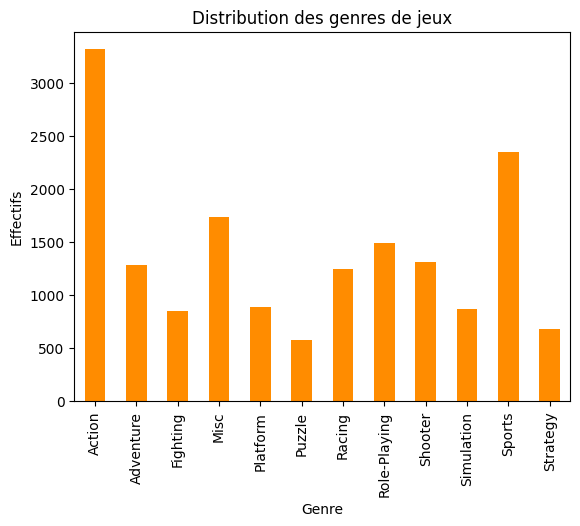

In [20]:
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"
games.Genre.value_counts().sort_index().plot(kind="bar", color='darkorange')

# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Genre')
plt.ylabel('Effectifs')
plt.title('Distribution des genres de jeux')

# Affichez le graphique
plt.show()

>__Question 4 :__ Représenter graphiquement, avec le diagramme le plus adapté, la distribution des jeux selon la **plateforme** et selon l'**année de publication**. Expliquer votre choix dans chacun des cas.

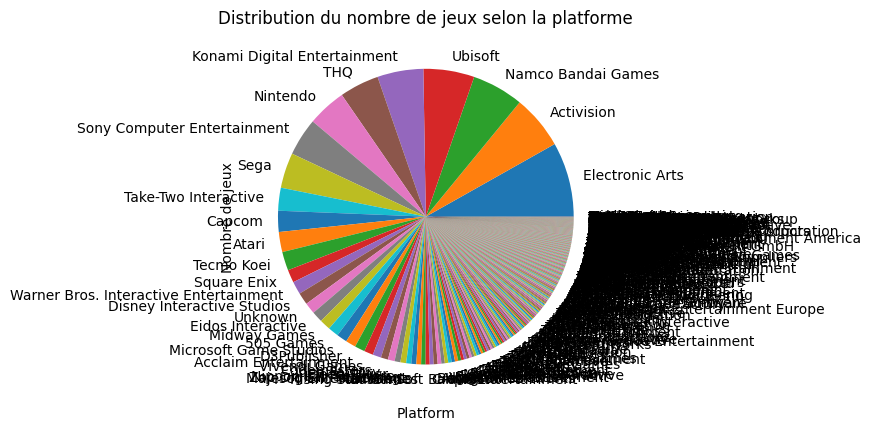

In [26]:
# Platform diagram
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"
games.Publisher.value_counts(normalize=True).plot(kind="pie", color='darkorange')

# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Platform')
plt.ylabel('Nombre de jeux')
plt.title('Distribution du nombre de jeux selon la platforme')

# Affichez le graphique
plt.show()

In [28]:
# Year diagram
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"
games.Genre.nunique().sort_index(games.Year.value_counts()).plot(kind="bar", color='darkorange')

# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Années')
plt.ylabel('Sorties de jeux')
plt.title('Distribution des genres de jeux')

# Affichez le graphique
plt.show()

AttributeError: 'int' object has no attribute 'sort_index'

>__Question 5 :__ En utilisant la méthode `plt.bar` de __matplotlib__, représenter graphiquement l'évolution de la vente globale de jeux vidéos depuis 1980.

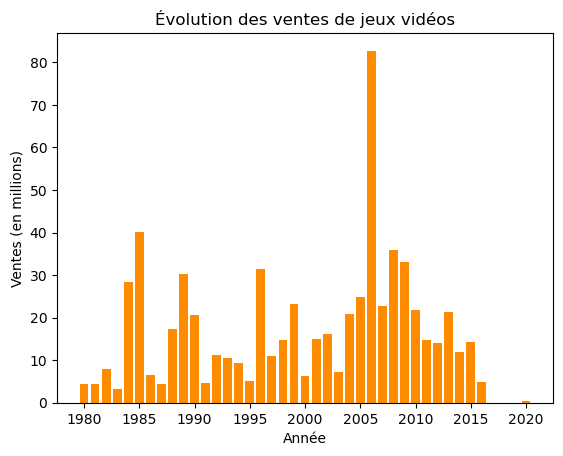

In [11]:
 # Évolution de `Global_Sales` selon `Year`
    
#TODO

### Histogrammes

Les histogrammes sont des représentations graphiques qui permettent de visualiser la distribution d'une __variable continue__, ces diagrammes sont utiles pour comprendre la répartition des différentes valeurs que prend une variable. Plus précisément :

- __Composants :__ Il est composé de rectangles adjacents, où chaque rectangle représente une plage de valeurs (bin).

- __Axe horizontal :__ L'axe horizontal représente la variable étudiée, divisée en intervalles pouvant être de largeurs distincts.

- __Axe vertical :__ L'axe vertical indique la fréquence (ou densité) des observations dans chaque intervalle, avec la hauteur du rectangle correspondante.

- __Surface des rectangles :__ La __surface__ de chaque rectangle est proportionnelle à la fréquence des observations dans la plage correspondante.

- __Interprétation :__ La __surface__ totale de tous les rectangles représente l'étendue des données et peut être interprétée comme une probabilité.

- __Utilisation :__ Utile pour visualiser la forme de la distribution des données de __variables continues__.

- __Paramètres :__ Peut être personnalisé avec des paramètres tels que le nombre de bacs (bins), le tri, et la normalisation.

>__Question 6 :__ En utilisant la méthode `plt.hist()` de __matplotlib__, tracer plusieurs histogrammes représentant les ventes globales des 50 jeux vidéos ayant le plus de ventes.

(array([30., 18.,  1.]),
 array([10., 20., 40., 80.]),
 <BarContainer object of 3 artists>)

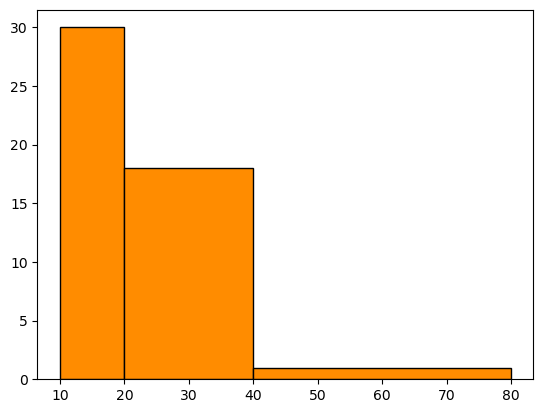

In [5]:
# Histogramme des ventes globales


## 2 - Recherches et manipulations des données

Dans cette partie on se concentre sur la recherche et l'organisation de certaines données du tableau. Cela peut amener à  travailler sur un __échantillon__ de la __population__ de départ.




>__Question 7 :__ Grâce à des commande sur le __dataframe__ `games`, trouver les informations suivantes :
> - Afficher la quatrième ligne
> - Récupérer le contenu de la colonne "Platform"
> - Récupérer l'index du jeu "Mario Kart Wii"
> - Récupérer l'index de la version PC de "Portal 2"
> - Récupérer le genre du jeu "Tetris"

In [35]:
#print(games.iloc[4])
#print(games.filter(regex='Platform')) ou games['Platform]
#print(games.loc[ games['Name'] == "Mario Kart Wii" ].index[0])
print(games[ (games['Name'] == "Portal 2") & (games['Platform'] == "PC") ])
print(games[games['Name'] == "Tetris"])

      Rank      Name Platform    Year    Genre       Publisher  NA_Sales  \
2699  2701  Portal 2       PC  2011.0  Shooter  Valve Software      0.33   

      EU_Sales  JP_Sales  Other_Sales  Global_Sales  
2699      0.32       0.0         0.11          0.76  
0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: Name, Length: 16598, dtype: bool


Voici une liste de fonctions pouvant vous être utile pour la question suivante.
- `game.loc[ games['Genre'] == "Action" ]` Donne l'échantillon contenant tous les jeux du genre "Action".
- `index` et `reset_index` Donne l'indice d'un élément dans un tableau ou réinitialise les indices du tableau.

>__Question 8 :__ Choisissez un jeu publié entre 1980 et 2020. Grâce aux fonctions précédentes, donner la position de ce jeu dans `games`, son genre, son année de publication ainsi que ses ventes globales.  
>
> Puis, créer un tableau contenant l'ensemble des jeux du même genre que le jeu choisi. __Enfin__, donner le nouveau classement de vente de votre jeu parmis les autre jeux du même genre.

In [ ]:
# Initialisation
jeu = "***"
genre = games. ...

# Tableau des jeux du même genre
.
.
.

indice = ...

print("Le rang de", jeu ,"dans la catégorie", genre ,"est", indice)